In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('fifa21_raw_data_v2.csv',sep=',')

C:\Users\aniru\AppData\Local\Temp\ipykernel_18716\2980529521.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fifa21_raw_data_v2.csv',sep=',')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [9]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


<strong>Data Cleaning and Preprocessing</strong>

Handling Weight and Height issues

In [10]:
df.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

Let us convert the height of every player to cm.

In [11]:
def h_to_cm(x):
    if 'cm' in x:
        return int(x.replace('cm',''))
    h=x.split("'")
    return round(int(h[0])*30.48 + int(h[1][:-1])*2.54)
print(h_to_cm("6'0\""))
print(h_to_cm('170cm'))

183
170


In [12]:
df['Height']=df['Height'].apply(h_to_cm)

In [13]:
df.Height.dtype

dtype('int64')

In [14]:
df.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

Let us convert the weight of all the players to pounds.

In [15]:
def w_to_pd(x):
    if 'lbs' in x:
        return int(x[:-3])
    return int(x[:-2])*2.20

print(w_to_pd('170lbs'))
print(w_to_pd('99kg'))

170
217.8


In [16]:
df['Weight']=df['Weight'].apply(w_to_pd)

In [17]:
df.Weight.dtype

dtype('float64')

In [18]:
df.rename(columns={'Weight':'Weight_lbs', 'Height': 'Height_cm'},inplace=True)
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height_cm',
       'Weight_lbs', 'Preferred Foot', 'BOV', 'Best Position', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 

Converting Date Joined to Datetime format.

In [19]:
df['Joined']=pd.to_datetime(df.Joined)
df['Joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2018-07-13
18975   2020-08-01
18976   2019-03-08
18977   2020-09-22
18978   2019-07-29
Name: Joined, Length: 18979, dtype: datetime64[ns]

Actually this isn't very readable. Let us convert it to Year, Month and Day.

In [20]:
df['Joined_Year']=df.Joined.dt.year
df['Joined_Month']=df.Joined.dt.month_name()
df['Joined_Day']=df.Joined.dt.day

In [21]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_Year,Joined_Month,Joined_Day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,85,92,91,95,38,65,771,2004,July,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,89,93,81,89,35,77,562,2018,July,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,87,92,78,90,52,90,150,2014,July,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,76,86,93,88,64,78,207,2015,August,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,91,85,86,94,36,59,595,2017,August,3


Now let us convert the wage,value and release clause columns to integers.

In [22]:
def format_the_amount(x):
    x = x.replace('€', '')
    if 'M' in x:
        return int(float(x[:-1])*1000*1000)
    elif 'K' in x:
        return int(float(x[:-1])*1000)
    else:
        return round(float(x))

In [23]:
df.loc[:,['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].applymap(format_the_amount)

C:\Users\aniru\AppData\Local\Temp\ipykernel_18716\4186477224.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].applymap(format_the_amount)


In [24]:
df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000


In [25]:
df['Value'] = df['Value'].astype(int)
df['Wage'] = df['Wage'].astype(int)
df['Release Clause'] = df['Release Clause'].astype(int)

Let us now convert all star value tables to integers only

In [26]:
df.IR.unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [27]:
df.SM.unique()

array(['4★', '5★', '1★', '2★', '3★'], dtype=object)

In [28]:
df['W/F'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

Let us use the strip() method to remove the stars.

In [29]:
df['IR']=df['IR'].str.strip('★').str.strip().astype(int)
df['SM']=df['SM'].str.strip('★').str.strip().astype(int)
df['W/F']=df['W/F'].str.strip('★').str.strip().astype(int)

In [30]:
df[['IR','SM','W/F']].head()

,IR,SM,W/F
0,5,4,4
1,5,5,4
2,3,1,3
3,4,4,5
4,5,5,5


In [31]:
df[['IR','SM','W/F']].dtypes

IR     int32
SM     int32
W/F    int32
dtype: object

Removing newline charecters

In [32]:
#checking for columns with newline charecters
df.columns[df.astype('str').apply(lambda col: col.str.contains('\\n').any())]

Index(['Club'], dtype='object')

In [33]:
df['Club']=df['Club'].str.strip('\n')

In [34]:
df['Club']

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

The contract column does not make much sense as players are offered new deals. Contract until makes much more sense.

In [35]:
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [36]:
def con(x):
    if '~' in x:
        s,endyr=map(str,x.split(' ~ '))
        return 'June 30, ' +endyr  #that is when the contracts generally end in the football calender
    elif 'Loan' in x:
        x=x.replace('On Loan', '')
        return x
    else:
        return 'Free Agent'    #free agents

In [37]:
df['Contract_until'] = df['Contract'].apply(con)

In [38]:
df['Contract_until'].unique()

array(['June 30, 2021', 'June 30, 2022', 'June 30, 2023', 'June 30, 2024',
       'June 30, 2025', 'June 30, 2026', 'Jun 30, 2021 ', 'Free Agent',
       'June 30, 2028', 'June 30, 2020', 'June 30, 2027', 'Dec 31, 2020 ',
       'Jan 30, 2021 ', 'Jun 30, 2022 ', 'May 31, 2021 ', 'Jul 5, 2021 ',
       'Dec 31, 2021 ', 'Jul 1, 2021 ', 'Jan 1, 2021 ', 'Aug 31, 2021 ',
       'Jan 31, 2021 ', 'Dec 30, 2021 ', 'Jun 23, 2021 ', 'Jan 3, 2021 ',
       'Nov 27, 2021 ', 'Jan 17, 2021 ', 'Jun 30, 2023 ', 'Jul 31, 2021 ',
       'Nov 22, 2020 ', 'May 31, 2022 ', 'Dec 30, 2020 ', 'Jan 4, 2021 ',
       'Nov 30, 2020 ', 'Aug 1, 2021 '], dtype=object)

In [46]:
#saving the data 
df.to_csv('fifa_data_clean.csv') 

<strong>EDA</strong>

Wage and Value relation

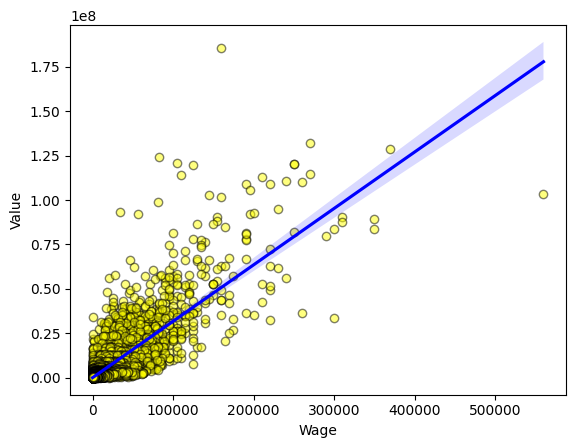

In [39]:
sns.regplot(x="Wage",y='Value',data=df,scatter_kws={'edgecolor' : 'black','linewidth' : 1, 'alpha':0.5, 'color' : 'yellow'},line_kws={'color': 'blue'})
plt.show()


Age distribution of Underpaid players (Players with high value but low wages)

Age
21    962
23    959
22    935
24    871
20    845
25    670
19    635
26    600
18    551
27    547
Name: count, dtype: int64

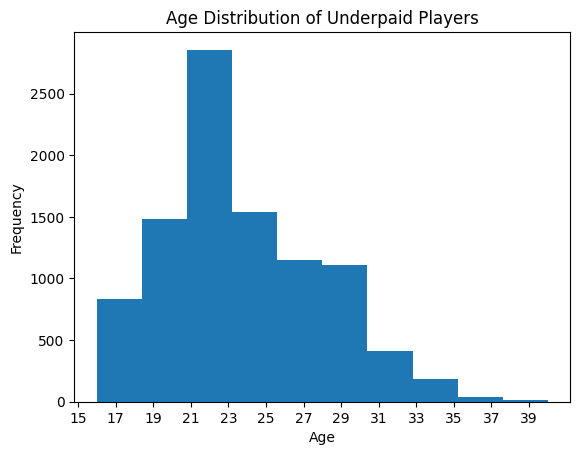

In [40]:
#**
from scipy import stats
s, b, r, p, stderr = stats.linregress(df.Wage, df.Value)
y_predited = s * df.Wage + b

display(df[df.Value > y_predited].Age.value_counts().head(10))

df[df.Value > y_predited].Age.plot(kind='hist')

plt.title("Age Distribution of Underpaid Players")
plt.xlabel('Age')
plt.xticks(np.arange(15,40,2))

plt.show()

21-23 Highly Underpaid

Relation between Wage Budget and Valuation of Players

In [41]:
data=df.groupby('Club')[['Wage','↓OVA','Age']].agg({'Wage': 'sum','↓OVA':'sum','Age':'mean'})
data=data.reset_index().sort_values('↓OVA', ascending=False)[1:]
data

,Club,Wage,↓OVA,Age
131,Chelsea,2534000,2580,25.121212
387,Manchester United,2986000,2577,25.212121
374,Liverpool,3028500,2554,24.575758
613,Tottenham Hotspur,2495000,2538,24.909091
214,FC Barcelona,4083000,2533,24.242424
...,...,...,...,...
456,Perth Glory,45200,1123,26.611111
29,Adelaide United,17450,1089,24.222222
99,Brisbane Roar,19400,1077,25.166667
392,Melbourne Victory,32800,1060,23.333333


C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

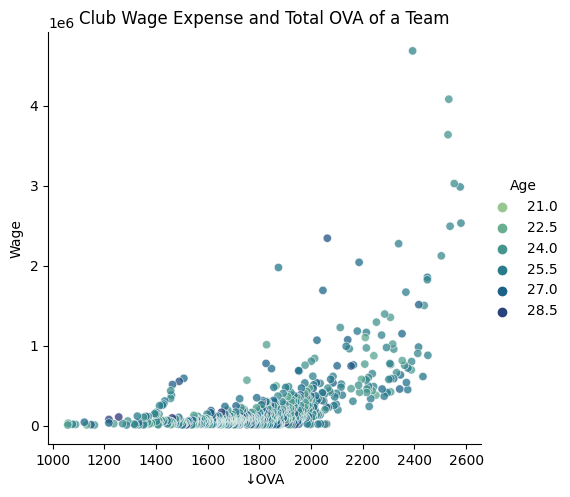

In [42]:
sns.relplot(x='↓OVA', y = 'Wage', data=data, kind='scatter',palette='crest', hue='Age', alpha=0.75)

plt.title('Club Wage Expense and Total OVA of a Team')

plt.show()

When a team's OVA reaches a range of approximately 2200 to 2400, increasing the wage expense does not result in a significant additional OVA boost for the team.
Let's remove the outliers and see what the scatterplot of the majority of clubs looks like.

C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aniru\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

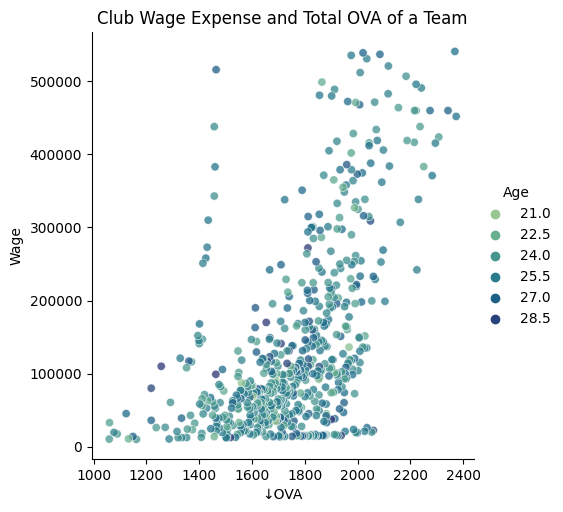

In [43]:
# IQR interquartile range method used to remove outliers

q1, q3 = np.percentile(data.Wage,[25,75])

iqr_value = q3 - q1
lower_boundary = q1 - iqr_value * 1.5
upper_boundary = q3 + iqr_value * 1.5


data_new = data.query(f'Wage >= {lower_boundary} and Wage <= {upper_boundary}')


sns.relplot(x='↓OVA', y = 'Wage', data=data_new, kind='scatter',palette='crest', hue='Age', alpha=0.75)
plt.title('Club Wage Expense and Total OVA of a Team')

plt.show()

Analysis of positional strength in a few top clubs

In [44]:
data_24 = df[df.Club.isin(data[data['↓OVA'] > 2400].Club.values)]

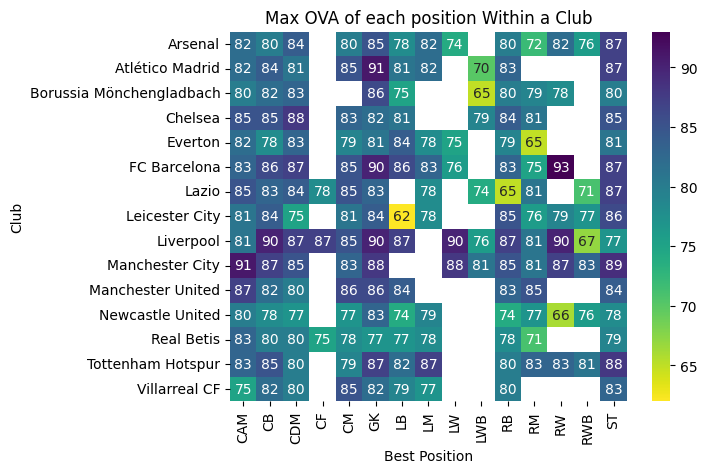

In [45]:
# Obtain the maximum OVA for each position within each club.
data_241 = data_24.groupby(['Club','Best Position'])['↓OVA'].max().unstack()
data_241
sns.heatmap(data_241, annot=True, cmap='viridis_r')

plt.title('Max OVA of each position Within a Club')
plt.show()